In [108]:
import numpy as np
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import periodogram
%matplotlib inline

# Machine Intelligence II

## Exercise Sheet 06: Independent Component Analysis

### Group WALB: Wichert, Alevi, Lang, Boelts

### 6.1

In [114]:
# 6.1 (a)
rate = 8192
seed = 13
sound1 = np.loadtxt('../sounds/sound1.dat')
sound2 = np.loadtxt('../sounds/sound2.dat')
sounds = np.concatenate([[sound1, sound2]], axis=1)

# 6.1 (b)
A = np.linalg.inv(np.random.RandomState(seed+4).rand(2,2))
X0 = A.dot(sounds)

# 6.1 (c)
X = X0[:,np.random.RandomState(seed+1).permutation(X.shape[1])]
X_perm = X[:]

# 6.1 (d)
p1,_ = pearsonr(sounds[0,:],X[0,:])
p2,_ = pearsonr(sounds[0,:],X[1,:])
p3,_ = pearsonr(sounds[1,:],X[0,:])
p4,_ = pearsonr(sounds[1,:],X[1,:])

# 6.1 (e)
X -= X.mean(axis=1).reshape((2, 1))

# 6.1 (f)
W = np.linalg.inv(np.random.RandomState(seed+1).rand(2,2))
W_nat = W[:]
W_nat[0,0] = 1 # Bell-Seijnowski solution'
W_nat[1,1] = 1

(2, 18000)


### 6.2

In [110]:
def sigmoid(y):
    return 1 / (1 + np.exp(-y))

def psi(y):
    return 1 - 2 * sigmoid(y)

# 6.2 (a)
def update_regular(W, x):
    W_inv = np.linalg.inv(W)    
    delta_W = W_inv.T + psi(W.dot(x)).reshape(2,1).dot(x.reshape(1,2))
    return delta_W

# 6.2 (b)
def update_natural(W, x):
    phee = psi(W.dot(x)).reshape(2,1)
    delta_W = np.dot(phee.dot(np.dot(W, x).reshape(1,2)), W)
    delta_W = delta_W + W # multiplied out delta function
    delta_W[0,0] = 0 # Bell-Seijnowski solution
    delta_W[1,1] = 0 # Bell-Seijnowski solution
    return delta_W

In [111]:
# 6.3 (c)
eta_0 = 20
for time, example in enumerate(X.T):
    eta = eta_0 / (time + 1)
    W += eta * update_regular(W, example)
unmixed_reg = W.dot(A.dot(sounds))

eta_0 = .15
for time, example in enumerate(X.T):
    eta = eta_0 / (time + 1)
    W_nat += eta * update_natural(W_nat, example)
    assert not np.isnan(W_nat[0,0])
unmixed_nat = W_nat.dot(A.dot(sounds))

### 6.3

In [112]:
# 6.3 (a)

wavfile.write('rec1.wav', rate, rec[0,:])
wavfile.write('rec2.wav', rate, rec[1,:])
wavfile.write('rec_nat1.wav', rate, rec_nat[0,:])
wavfile.write('rec_nat2.wav', rate, rec_nat[1,:])
wavfile.write('dist1.wav', rate, X0[0,:]) 
wavfile.write('dist2.wav', rate, X0[1,:])
wavfile.write('dist_perm1.wav', rate, X_perm[0,:])
wavfile.write('dist_perm2.wav', rate, X_perm[1,:])

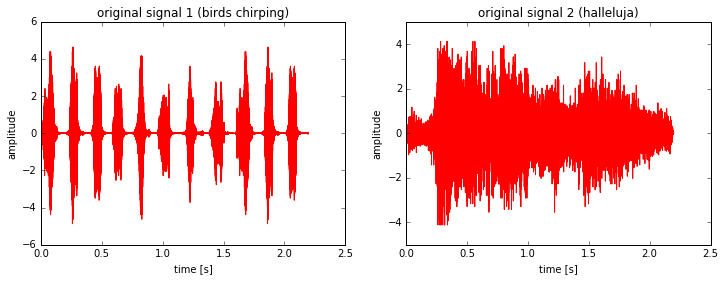

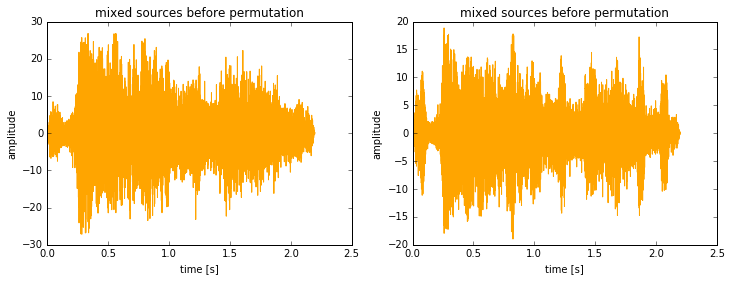

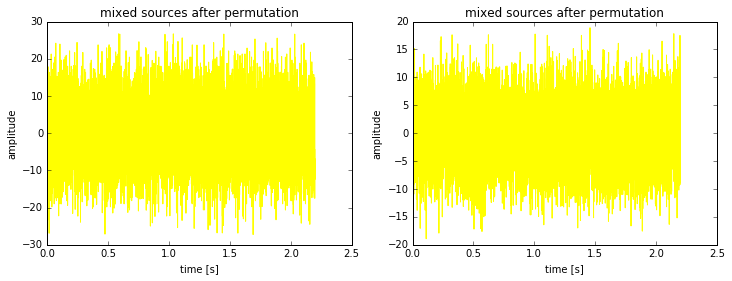

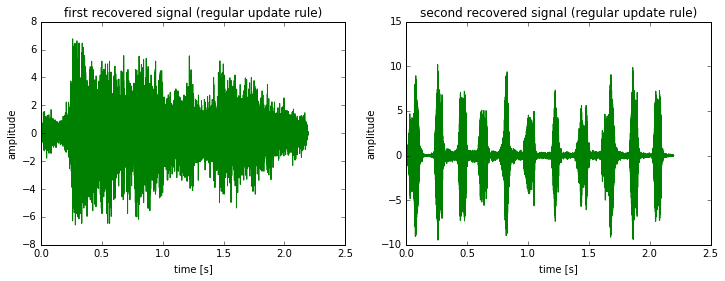

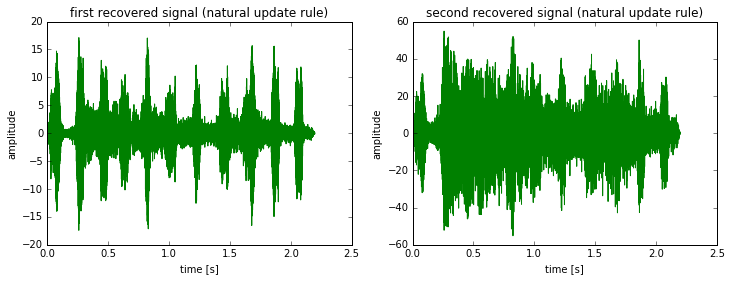

In [113]:
time = np.arange(sounds.shape[1]) / rate

plt.figure(figsize=(12,4))
plt.subplot('121')
plt.plot(time, sound1, color='red')
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('original signal 1 (birds chirping)')
plt.subplot('122')
plt.plot(time, sound2, color='red')
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('original signal 2 (halleluja)')

plt.figure(figsize=(12,4))
plt.subplot('121')
plt.plot(time, X0[0,:], color='orange')
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('mixed sources before permutation')
plt.subplot('122')
plt.plot(time, X0[1,:], color='orange')
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('mixed sources before permutation')

plt.figure(figsize=(12,4))
plt.subplot('121')
plt.plot(time, X_perm[0,:], color='yellow')
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('mixed sources after permutation')
plt.subplot('122')
plt.plot(time, X_perm[1,:], color='yellow')
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('mixed sources after permutation');

plt.figure(figsize=(12,4))
plt.subplot('121')
plt.plot(time, unmixed_reg[0,:], color='green')
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('first recovered signal (regular update rule)')
plt.subplot('122')
plt.plot(time, unmixed_reg[1,:], color='green')
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('second recovered signal (regular update rule)')

plt.figure(figsize=(12,4))
plt.subplot('121')
plt.plot(time, unmixed_nat[0,:], color='green')
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('first recovered signal (natural update rule)')
plt.subplot('122')
plt.plot(time, unmixed_nat[1,:], color='green')
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('second recovered signal (natural update rule)')